In [167]:
import numpy as np
import pandas as pd

In [168]:
d1 = pd.read_csv('1d-gamma-versus-sample.csv')
d2 = pd.read_csv('2d-gamma-versus-sample.csv')
d3 = pd.read_csv('3d-gamma-versus-sample.csv')
d4 = pd.read_csv('4d-gamma-versus-sample.csv')

In [169]:
d1

,eta,theoretical bound,practical sample
0,0.00,4699.170912,149.04
1,0.05,5801.445570,259.84
2,0.10,7342.454550,348.96
3,0.15,9590.144718,604.40
4,0.20,13053.252533,978.00
5,0.25,18796.683647,1474.56
6,0.30,29369.818199,3013.20
7,0.35,52213.010132,6352.00
8,0.40,117479.272796,9014.40


In [170]:
d1_data = np.array(d1['practical sample'])
d2_data = np.array(d2['practical sample'])
d3_data = np.array(d3['practical sample'])
d4_data = np.array(d4['practical sample'])

In [171]:
d1_ratio = d1_data/d1['theoretical bound']
d2_ratio = d2_data/d2['theoretical bound']
d3_ratio = d3_data/d3['theoretical bound']
d4_ratio = d4_data/d4['theoretical bound']

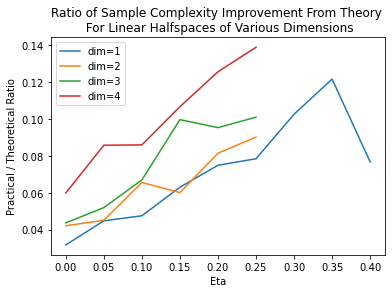

In [172]:
import matplotlib.pyplot as plt
plt.plot(d1['eta'], d1_ratio, label="dim=1")
plt.plot(d2['eta'], d2_ratio, label="dim=2")
plt.plot(d3['eta'], d3_ratio, label="dim=3")
plt.plot(d4['eta'], d4_ratio, label="dim=4")
plt.xlabel("Eta")
plt.ylabel("Practical / Theoretical Ratio")
plt.title("Ratio of Sample Complexity Improvement From Theory \n For Linear Halfspaces of Various Dimensions")
plt.legend()
plt.savefig("Improvement-Ratios.png")
plt.show()

In [173]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(np.reshape(np.array(d1['eta']), (-1, 1)), d1_ratio)
print(lin.coef_)
print(lin.intercept_)
print(lin.score(np.reshape(np.array(d1['eta']), (-1, 1)), d1_ratio))

[0.1787416]
0.03551930585636681
0.735894097475983


In [174]:
lin = LinearRegression()
lin.fit(np.reshape(np.array(d2['eta']), (-1, 1)), d2_ratio)
print(lin.coef_)
print(lin.intercept_)
print(lin.score(np.reshape(np.array(d2['eta']), (-1, 1)), d2_ratio))

[0.19658873]
0.03951921297942146
0.916316059015744


In [175]:
lin = LinearRegression()
lin.fit(np.reshape(np.array(d3['eta']), (-1, 1)), d3_ratio)
print(lin.coef_)
print(lin.intercept_)

print(lin.score(np.reshape(np.array(d3['eta']), (-1, 1)), d3_ratio))

[0.25675557]
0.04434022343906849
0.8845794393374604


In [176]:
lin = LinearRegression()
lin.fit(np.reshape(np.array(d4['eta']), (-1, 1)), d4_ratio)
print(lin.coef_)
print(lin.intercept_)

print(lin.score(np.reshape(np.array(d4['eta']), (-1, 1)), d4_ratio))

[0.30597854]
0.06224571463198072
0.9697815328523033


In [177]:
interval = pd.read_csv('1d-gamma-versus-sample-INTERVAL-main.csv').dropna()

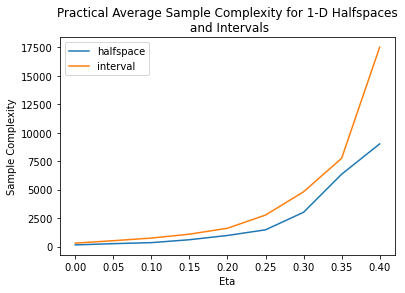

In [178]:
plt.plot(d1['eta'], d1_data, label='halfspace')
plt.plot(interval['eta'], interval['practical sample'], label='interval')
plt.xlabel("Eta")
plt.ylabel("Sample Complexity")
plt.title("Practical Average Sample Complexity for 1-D Halfspaces\n and Intervals")
plt.legend()
plt.savefig('Practical-Halfspace-Interval-Comp.png')
plt.show()

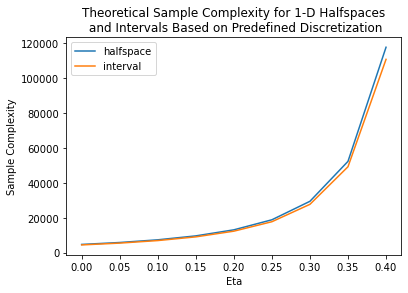

In [191]:
plt.plot(d1['eta'], d1['theoretical bound'], label='halfspace')
plt.plot(interval['eta'], interval['new theory'], label='interval')
plt.xlabel("Eta")
plt.ylabel("Sample Complexity")
plt.title("Theoretical Sample Complexity for 1-D Halfspaces\n and Intervals Based on Predefined Discretization")
plt.legend()
plt.savefig('Theoretical-Halfspace-Interval-Comp.png')
plt.show()

In [188]:
# Corrected some previous code... oops
interval['new theory'] = interval['theoretical bound'] / np.log(2 * (10 ** 4 * (10 ** 4 - 1) / 2) /0.1) * np.log(2 * (2 * 10 ** 4 * (2 * 10 ** 4 - 1) / 2)/0.1)
# Corrected some previous code... oops
interval_new['new theory'] = interval_new['theoretical bound'] / np.log(2 * (10 ** 3 * (10 ** 3 - 1) / 2) /0.1) * np.log(2 * (2 * 10 ** 3 * (2 * 10 ** 3 - 1) / 2)/0.1)

In [ ]:
interval

In [180]:
from scipy.special import comb

In [181]:
comb(20000, 2) - (2 * 10 ** 4 * (2 * 10 ** 4 - 1) / 2)

0.0

In [182]:
np.log(comb(20000, 2)) / np.log(comb(10000, 2))

1.078203331593585

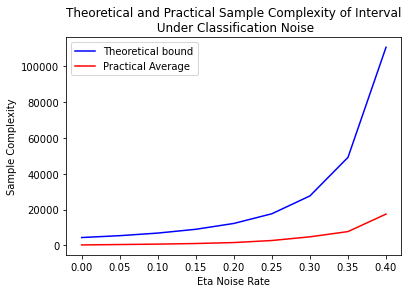

In [189]:
plt.plot(interval['eta'], interval['new theory'], label="Theoretical bound", color='blue')
plt.plot(interval['eta'], interval['practical sample'], label="Practical Average", color='red')
plt.xlabel("Eta Noise Rate")
plt.ylabel("Sample Complexity")
plt.title("Theoretical and Practical Sample Complexity of Interval\n Under Classification Noise")
plt.legend()
plt.savefig("Interval-Whole-With-Large-Eta" + str(9) + '.png')
plt.show()


In [184]:
interval_new = pd.read_csv('1d-gamma-versus-sample-INTERVAL-NEW.csv').dropna()
interval_dense = pd.read_csv('1d-gamma-versus-sample-INTERVAL-DENSE.csv').dropna()

In [185]:
interval_new['new theory'] = interval_new['theoretical bound'] / np.log(2 * (10 ** 3 * (10 ** 3 - 1) / 2)  /0.1) * np.log(2 * (2*10 ** 3 * (2*10 ** 3 - 1) / 2) /0.1)
interval_dense

,eta,theoretical bound,practical sample
0,0.00,5342.945077,360.16
1,0.05,6596.228490,538.24
2,0.10,8348.351683,696.40
3,0.15,10903.969545,1070.72
4,0.20,14841.514102,1508.20
5,0.25,21371.780307,2509.12
6,0.30,33393.406730,4021.90
7,0.35,59366.056409,6659.40


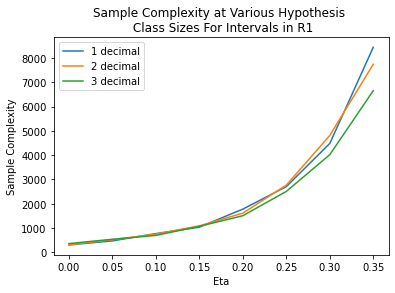

In [186]:

plt.plot(interval_new['eta'], interval_new['practical sample'], label="1 decimal")
plt.plot(interval['eta'][:8], interval['practical sample'][:8], label="2 decimal")
plt.plot(interval_dense['eta'], interval_dense['practical sample'], label="3 decimal")
plt.xlabel("Eta")
plt.ylabel("Sample Complexity")
plt.title("Sample Complexity at Various Hypothesis \n Class Sizes For Intervals in R1")
plt.legend()
plt.savefig("Dense versus Sparse.png")
plt.show()

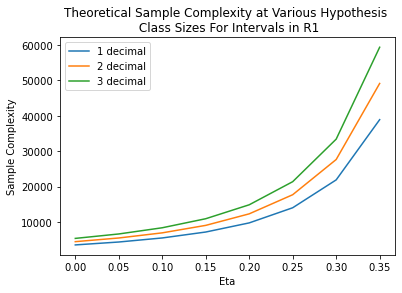

In [190]:

plt.plot(interval_new['eta'], interval_new['new theory'], label="1 decimal")
plt.plot(interval['eta'][:8], interval['new theory'][:8], label="2 decimal")
plt.plot(interval_dense['eta'], interval_dense['theoretical bound'], label="3 decimal")
plt.xlabel("Eta")
plt.ylabel("Sample Complexity")
plt.title("Theoretical Sample Complexity at Various Hypothesis \n Class Sizes For Intervals in R1")
plt.legend()
plt.savefig("Theoretical Dense versus Sparse.png")
plt.show()

In [196]:
disjunct_bounds = [4993.595609
,6164.932851, 7802.49314
, 10191.01145
, 13871.098914953436, 19974.382437532946]

disjunct_practice = [1152.8, 3385.8, 2706.6, 4311.8, 5682, 2728.2]
etas = [0, 0.05, 0.1, 0.15, 0.2, 0.25]

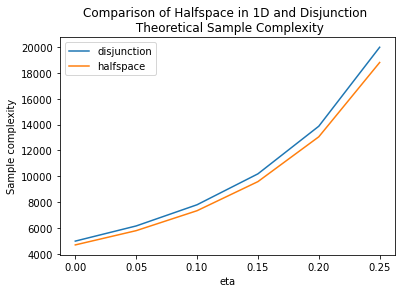

In [205]:
plt.plot(etas, disjunct_bounds, label='disjunction')
plt.plot(d1['eta'][:6], d1['theoretical bound'][:6], label='halfspace')
plt.xlabel('eta')
plt.ylabel('Sample complexity')
plt.title('Comparison of Halfspace in 1D and Disjunction \n Theoretical Sample Complexity')
plt.legend()
plt.savefig('Halfspace-Disjunct-Theory-Comp.png')
plt.show()

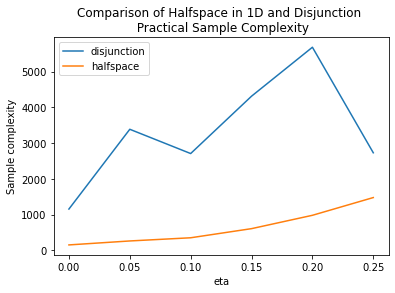

In [206]:
plt.plot(etas, disjunct_practice, label='disjunction')
plt.plot(d1['eta'][:6], d1['practical sample'][:6], label='halfspace')
plt.legend()
plt.xlabel('eta')
plt.ylabel('Sample complexity')
plt.title('Comparison of Halfspace in 1D and Disjunction \n Practical Sample Complexity')
plt.savefig('Halfspace-Disjunct-Practical-Comp.png')
plt.show()